<a href="https://colab.research.google.com/github/AishaKanwal/LGMVIP-DataScience/blob/main/Task5-MNIST-HandwritingPredictionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore - VirtualInternshipProgram - LGMVIP | DataScienceInternship**
> **Task 5 - Develop a Neural Network that can Read Handwriting**

> **Aisha Kanwal | Internee**

In [11]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

8


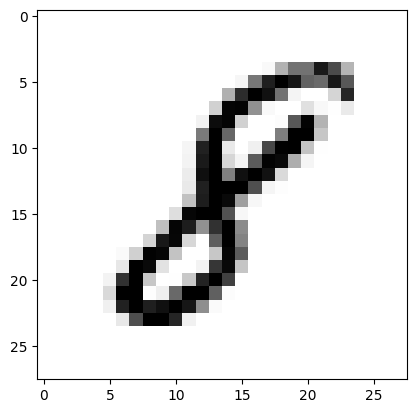

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [2]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape input data to 4D tensor
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2557 - accuracy: 0.9236 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0855 - accuracy: 0.9762 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0590 - accuracy: 0.9844 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0471 - accuracy: 0.9865 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0377 - accuracy: 0.9893 - val_loss: 0.0273 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0296 -

There are 60,000 images of handwritten digits, write an integer between 1 and 10,000 to see the image at that index and prediction by CNN model 345
1/1 [==============================] - 0s 25ms/step
The number is predicted as:  1


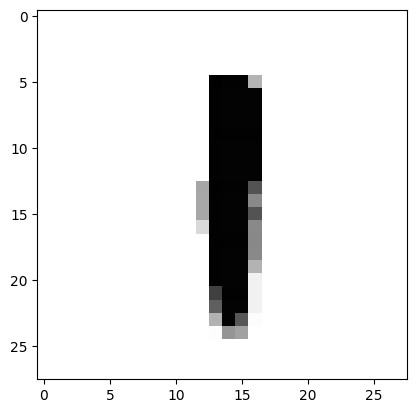

In [22]:
image_index = int(input("There are 60,000 images of handwritten digits, write an integer between 1 and 10,000 to see the image at that index and prediction by CNN model "))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The number is predicted as: ",pred.argmax())

**Task 5 - Develop a Neural Network that can Read Handwriting**

**Done by Aisha Kanwal**